In [1]:
## 導入lightgbm
import lightgbm as lgb
## 導入Scikit-Learn的評量套件
from sklearn import metrics
from sklearn.metrics import mean_squared_error
## 導入Scikit-Learn的內建數據集
from sklearn. datasets import load_iris
## 導入Scikit-Learn用來拆分訓練集和測試集的套件
from sklearn.model_selection import train_test_split

In [2]:
## 載入數據集
iris_dataset = load_iris()
data = iris_dataset.data
target = iris_dataset.target

## 拆分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split (data, target, test_size = 0.3)

In [3]:
## 創建成符合lgb特徵的數據集格式
## 將數據保存成LightGBM二進位文件，加載速度更快，占用更少內存空間
## 訓練集
lgb_train = lgb.Dataset(X_train, y_train)

## 測試集
lgb_test = lgb.Dataset(X_test, y_test, reference = lgb_train)

In [4]:
## 撰寫訓練用的參數
params = {
    'task': 'train',
    ## 算法類型
    'boosting': 'gbdt',
    'num_trees': 100,
    'num_leaves': 20,
    'max_depth': 6,
    'learning_rate': 0.04,
    ## 構建樹時的特徵選擇比例
    'feature_fraction': 0.5,
    'feature_fraction_seed': 8,
    "bagging_fraction":0.5,
    ## k 表示每k次迭代就進行bagging
    'bagging_freq':5,
    ## 如果數據集樣本分布不均衡，可以幫助明顯提高準確率
    'is_unbalance': True,
    'verbose':0,
    ## 目標函數
    'objective': 'regression',
    ## 度量指標
    'metric': {'rmse', 'auc'},
    # 度量輸出的頻率
    'metric_freq': 1,
}

In [5]:
## 訓練模型
test_results = {}
lgbm = lgb.train(params, lgb_train, valid_sets = lgb_test, num_boost_round = 20, early_stopping_rounds = 5, evals_result = test_results)

## 保存模型
lgbm.save_model('save_model.txt')

[1]	valid_0's rmse: 0.726682	valid_0's auc: 0.9375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's rmse: 0.711081	valid_0's auc: 0.96875
[3]	valid_0's rmse: 0.693849	valid_0's auc: 0.96875
[4]	valid_0's rmse: 0.681003	valid_0's auc: 0.96875
[5]	valid_0's rmse: 0.66496	valid_0's auc: 0.96875
[6]	valid_0's rmse: 0.649938	valid_0's auc: 0.96875
[7]	valid_0's rmse: 0.63089	valid_0's auc: 1
[8]	valid_0's rmse: 0.617558	valid_0's auc: 1
[9]	valid_0's rmse: 0.600192	valid_0's auc: 1
[10]	valid_0's rmse: 0.588422	valid_0's auc: 1
[11]	valid_0's rmse: 0.572009	valid_0's auc: 1
[12]	valid_0's rmse: 0.562296	valid_0's auc: 1
Early stopping, best iteration is:
[7]	valid_0's rmse: 0.63089	valid_0's auc: 1


C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [6]:
## 預測測試集
## 在訓練期間有啟動early_stopping_rounds， 就可以透過best_iteration來從最佳送代中獲得預測結果
y_pred = lgbm.predict(X_test, num_iteration = lgbm.best_iteration)
print(y_pred)

[1.0181914  0.82245603 1.10277751 1.06068292 1.14704397 0.91759193
 1.14704397 0.82245603 1.14704397 0.91759193 1.14704397 0.82245603
 0.82245603 1.14704397 0.82245603 1.14704397 1.10277751 1.01641647
 1.01641647 1.14704397 1.14704397 1.14704397 0.82245603 0.82245603
 0.82245603 1.14704397 1.06068292 1.10277751 1.14704397 1.10277751
 0.82245603 1.01641647 0.82245603 1.14704397 1.14704397 1.14704397
 1.14704397 0.8751004  0.82245603 0.82245603 0.8751004  1.14704397
 0.82245603 1.14704397 1.10277751]


In [7]:
## 評估模型的好壞
## RMSE
rmse = mean_squared_error (y_test, y_pred) ** 0.5
print('RMSE of the model: ', rmse)

RMSE of the model:  0.6308897254322255


In [8]:
# !pip install graphviz

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

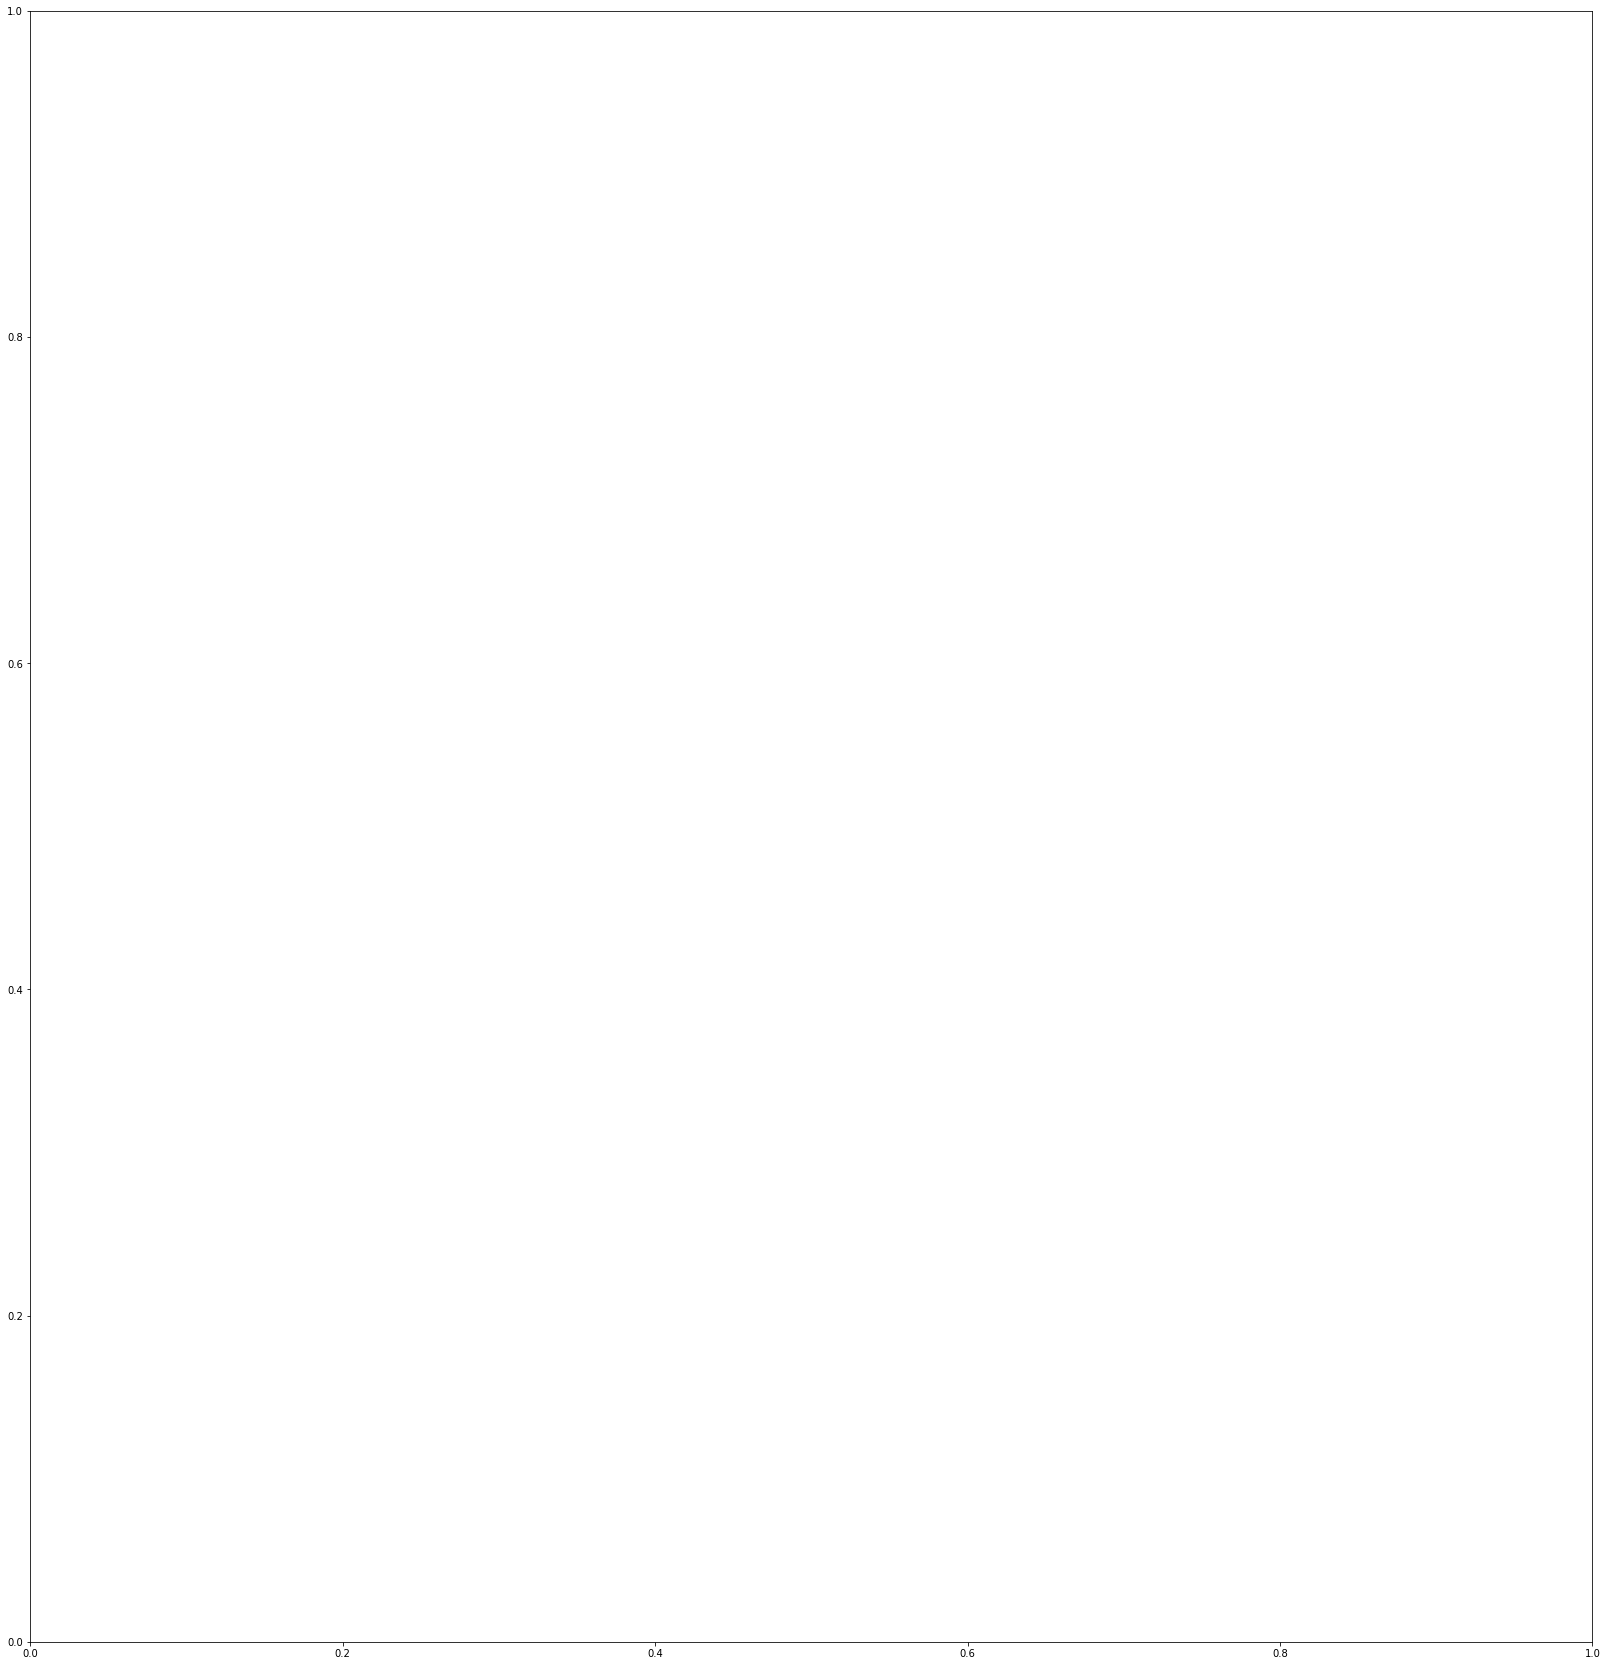

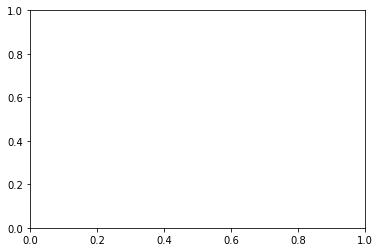

In [9]:
## 視覺化
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (28, 30))
ax = fig.subplots()
lgb.plot_tree(lgbm)
plt.show()
lgb.create_tree_digraph(lgbm, tree_index=1)

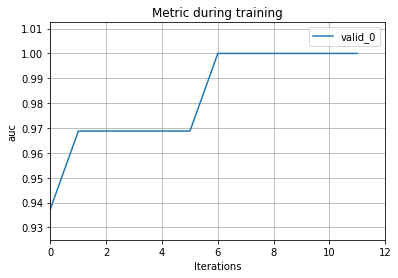

In [12]:
## 訓練結果視覺化
ax = lgb.plot_metric(test_results, metric = 'auc')
plt.show()

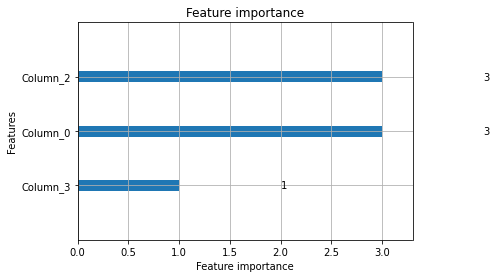

In [13]:
## 視覺化 • 特徵重要性排序
ax = lgb.plot_importance(lgbm, max_num_features = 10)
plt.show()